In [1]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incomp

In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 1

In [4]:
data_path = "/kaggle/input/paddy-disease-classification/train_images"

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [5]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"rice_dataloader_v{version}.pkl")

In [6]:
# dls = torch.load(f"/kaggle/working/rice_dataloader_v{version}.pkl")

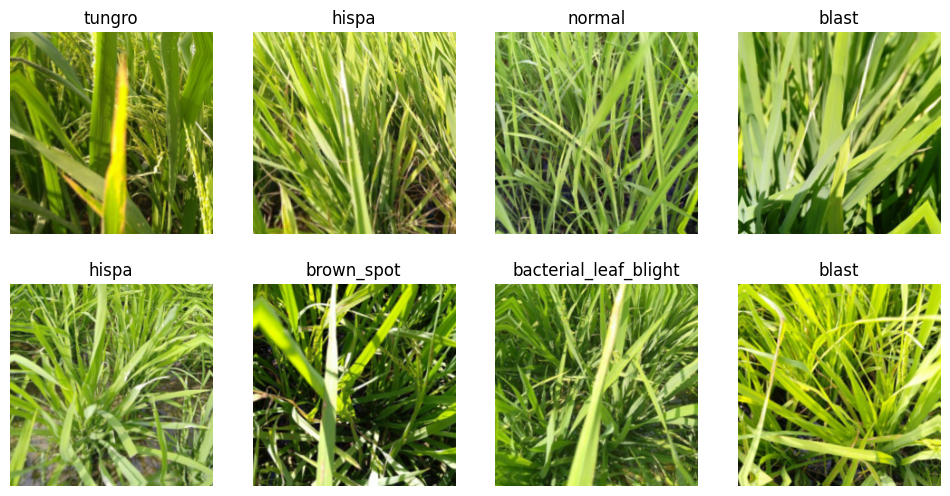

In [7]:
dls.train.show_batch(max_n=8, nrows=2)

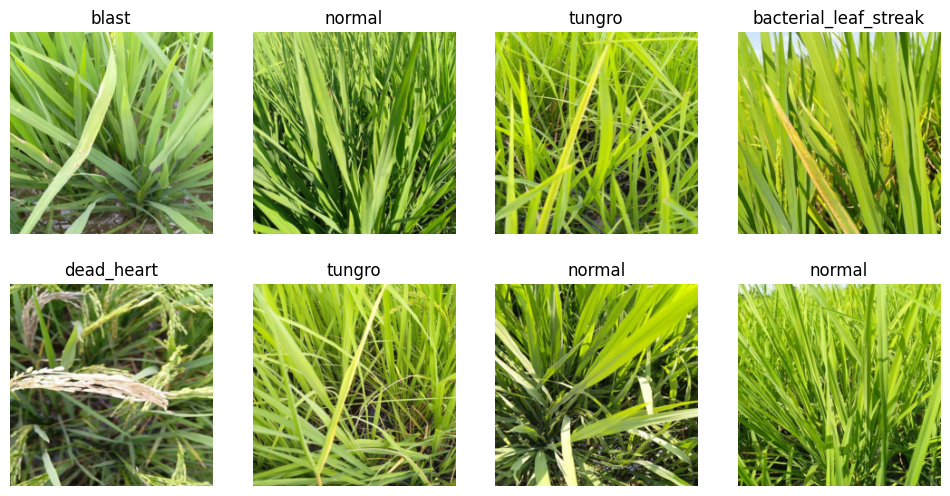

In [8]:
dls.valid.show_batch(max_n=8, nrows=2)

In [9]:
model_path = "models"

# RESNET34

In [10]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 188MB/s]


In [11]:
# model.load(f"rice-recognizer-v{version}")

In [12]:
model.fine_tune(15)

In [13]:
model.save(f"rice-recognizer-resnet34-v{version}")

Path('models/rice-recognizer-resnet34-v1.pth')

In [14]:
model.load(f"/kaggle/working/models/rice-recognizer-resnet34-v{version}")

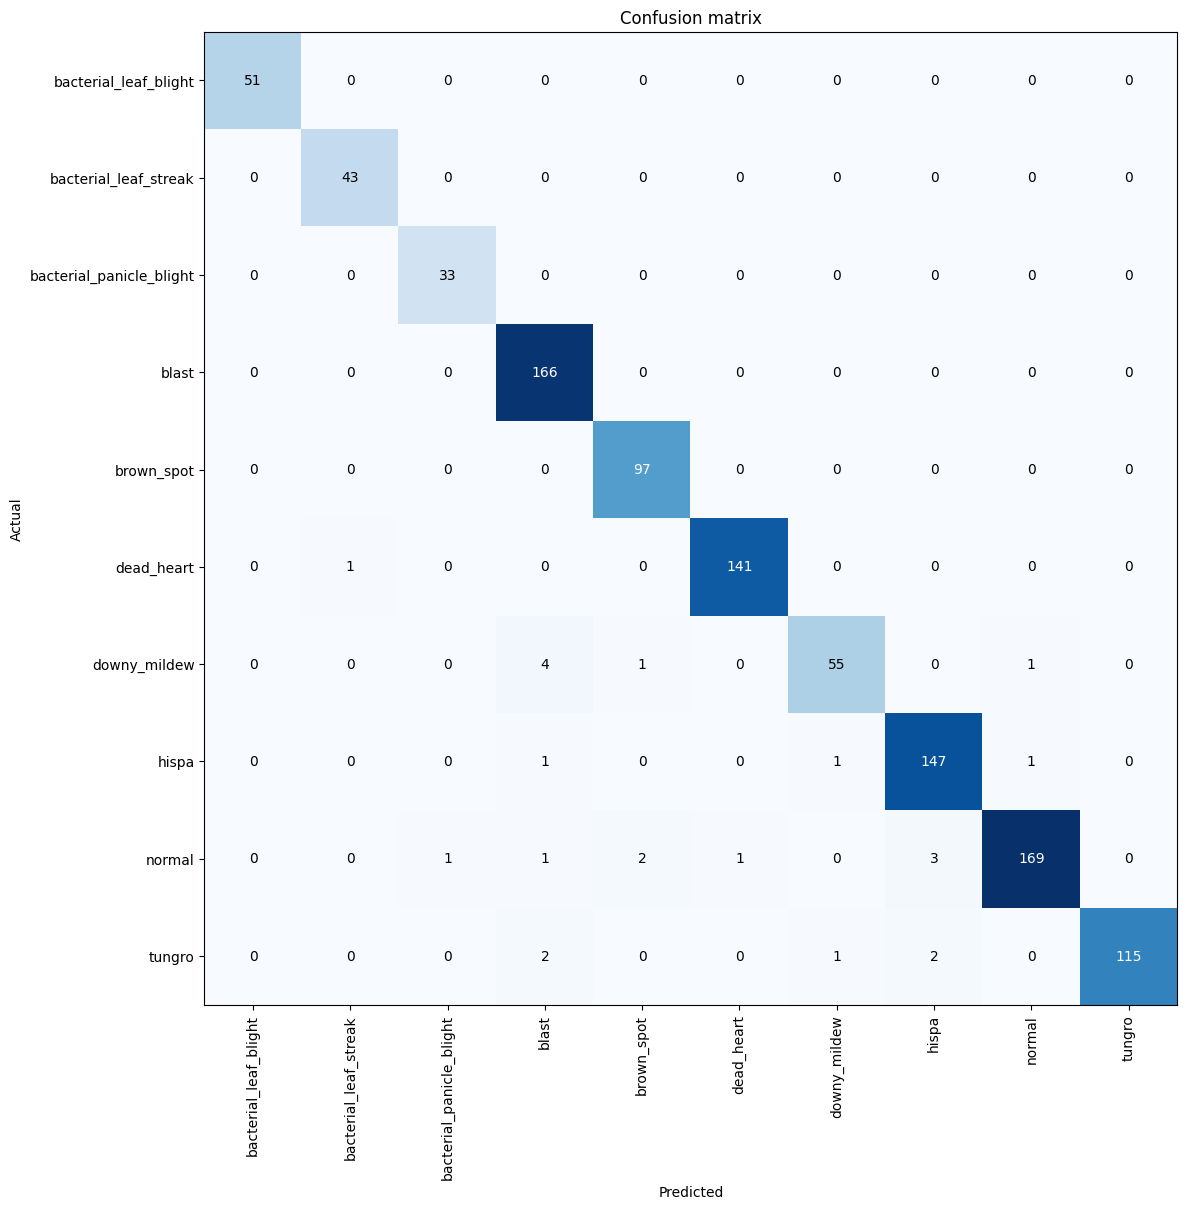

In [15]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(cmap="Blues", figsize = (12, 12))

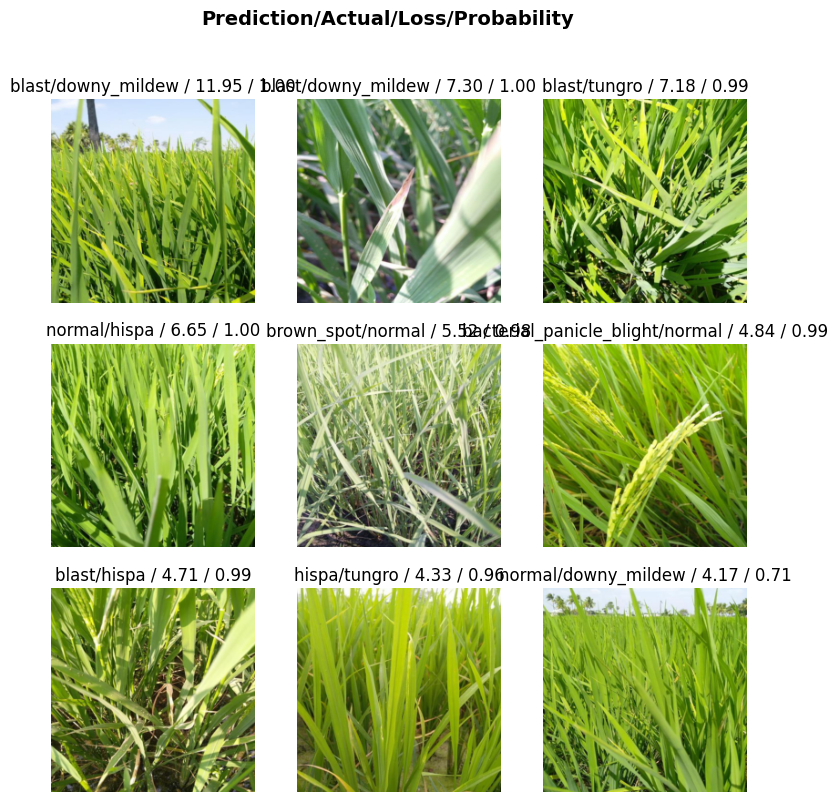

In [16]:
interp.plot_top_losses(9, nrows=3)

In [17]:
cleaner = ImageClassifierCleaner(model)
cleaner # 

In [18]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [19]:
model.export(f"{model_path}/rice-recognizer-resnet34-v{version}.pkl")

In [20]:
model.save(f"rice-recognizer-resnet34-v{version}.h5")
torch.save(model.model, f"rice-recognizer-resnet34-v{version}.pt")

# DENSENET169

In [21]:
model = vision_learner(dls, densenet169, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 193MB/s]


In [22]:
model.fine_tune(15)

In [23]:
model.save(f"rice-recognizer-densenet169-v{version}")

Path('models/rice-recognizer-densenet169-v1.pth')

In [24]:
model.load(f"/kaggle/working/models/rice-recognizer-densenet169-v{version}")

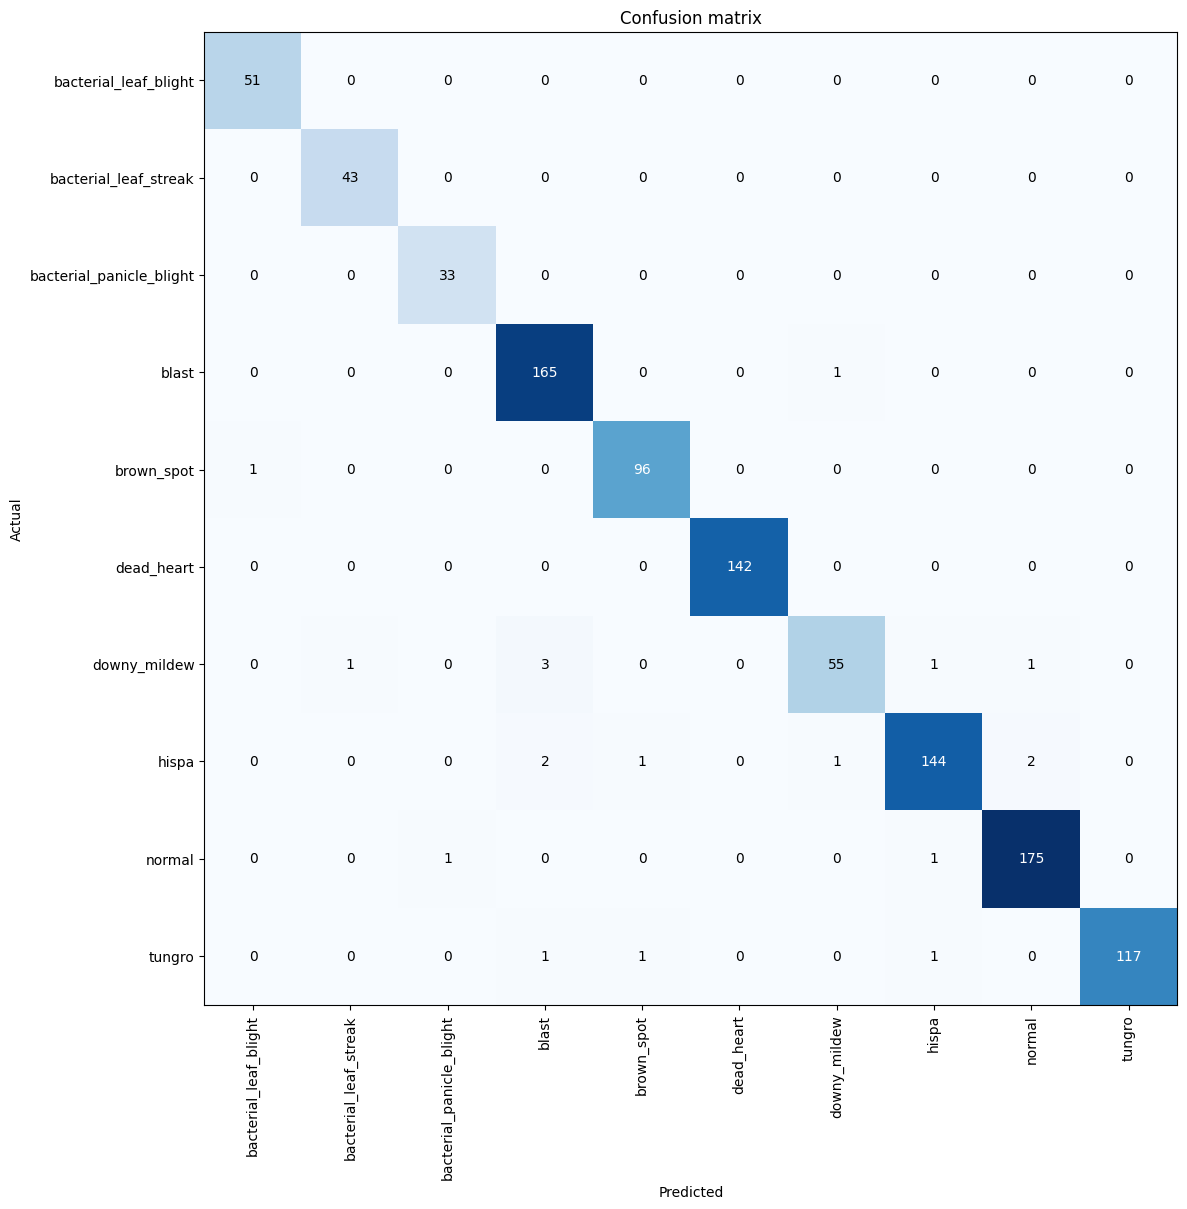

In [25]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(cmap="Blues", figsize = (12, 12))

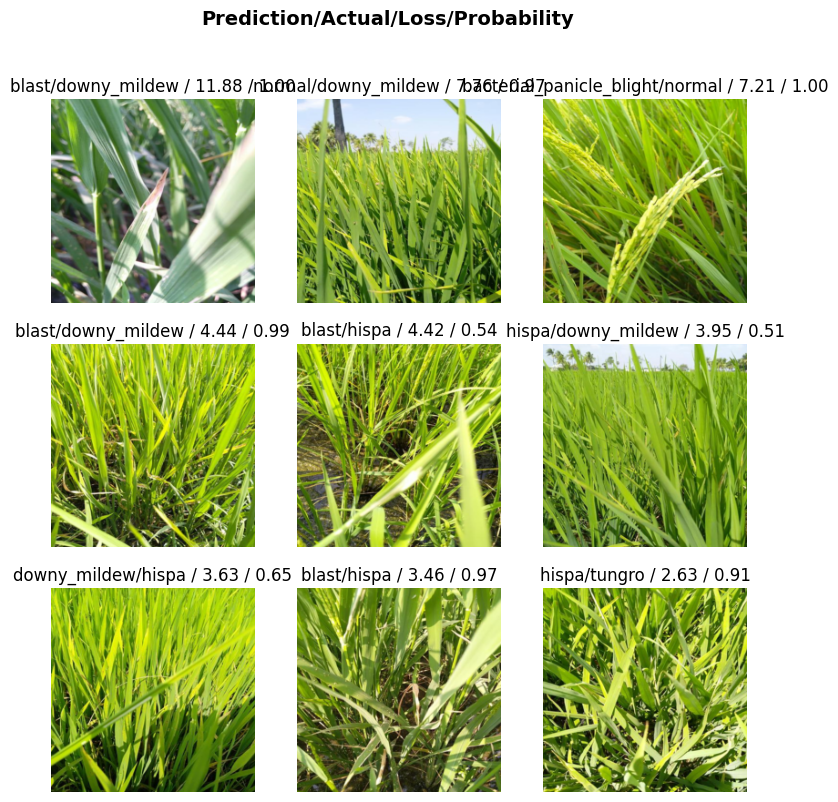

In [26]:
interp.plot_top_losses(9, nrows=3)

In [27]:
cleaner = ImageClassifierCleaner(model)
cleaner # 

In [28]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [29]:
model.export(f"{model_path}/rice-recognizer-densenet169-v{version}.pkl")

In [30]:
model.save(f"rice-recognizer-vgg16-v{version}.h5")
torch.save(model.model, f"rice-recognizer-densenet169-v{version}.pt")